**Table of contents**<a id='toc0_'></a>    
- [Upload dataset into Cloud Storage Bucket](#toc1_)    
- [Load the data from Bucket to BigQuery new table](#toc2_)    
- [Load data to BigQuery from Cloud Storage [Python]](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Upload dataset into Cloud Storage Bucket](#toc0_)

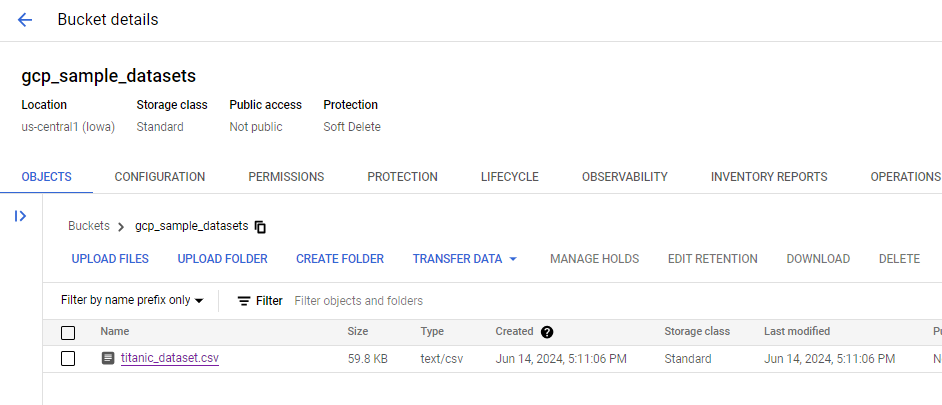

# <a id='toc2_'></a>[Load the data from Bucket to BigQuery new table[SQL]](#toc0_)

In [ ]:
LOAD DATA INTO burner-yasshaik1.dataset1.titanic_data
  OPTIONS(
  description="Table data loaded from BigQuery",
  expiration_timestamp="2025-01-01 00:00:00 UTC"
)
FROM FILES(
  format='CSV',
  uris = ['gs://gcp_sample_datasets/titanic_dataset.csv']
)

# <a id='toc3_'></a>[Load data to BigQuery from Cloud Storage [Python]](#toc0_)

In [ ]:
from google.cloud import bigquery

client = bigquery.Client()

table_id = 'burner-yasshaik1.dataset_sample.employee_data'

job_config = bigquery.LoadJobConfig(
    schema=[
        bigquery.SchemaField("name", "STRING"),
        bigquery.SchemaField("gender", "STRING"),
        bigquery.SchemaField("count", "INTEGER")
    ],
    source_format=bigquery.SourceFormat.CSV, skip_leading_rows=1, autodetect=True,
)

file_path= '/home/yasshaik1/BQ/employee.txt'
source_file = open(file_path, "rb")
job = client.load_table_from_file(source_file, table_id, job_config=job_config)

job.result()  # Waits for the job to complete.

table = client.get_table(table_id)  # Make an API request.
print("Loaded {} rows and table is {}".format(table.num_rows, table_id))

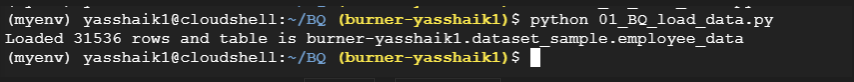